## Raw Data Visualizations

In [1]:
#Importing necessary modules for data management

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from scipy.interpolate import interp1d
import seaborn as sns

In [2]:
#Settings for LaTeX style plots

plt.rcParams.update({
    "font.family": "serif",
    "font.size": 24,
    "axes.titlesize": 24,
    "axes.labelsize": 24,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 12,
    "figure.figsize": (8, 6),
    "figure.dpi": 100,
    "savefig.dpi": 200,
    "savefig.format": "png",
    "savefig.transparent": True,
    "axes.grid": True,
    "grid.linewidth": 0.5,
    "grid.linestyle": "--",
    "grid.color": "0.8",
    "image.cmap": "Blues",
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
    "text.usetex": True, "mathtext.fontset": "cm",
    "pgf.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{cmbright}"
})

In [3]:
#Importing the raw data
data = pd.read_csv("../data/raw/dataset_mood_smartphone.csv", index_col=0)
data['time'] = pd.to_datetime(data['time'])
data = data.pivot_table(index=['id', 'time'], columns='variable', values='value')
data = data.sort_values(by='time')
data.reset_index(inplace=True)
print(data.describe().to_markdown())

|       | time                          |      activity |   appCat.builtin |   appCat.communication |   appCat.entertainment |   appCat.finance |   appCat.game |   appCat.office |   appCat.other |   appCat.social |   appCat.travel |   appCat.unknown |   appCat.utilities |   appCat.weather |   call |   circumplex.arousal |   circumplex.valence |       mood |        screen |   sms |
|:------|:------------------------------|--------------:|-----------------:|-----------------------:|-----------------------:|-----------------:|--------------:|----------------:|---------------:|----------------:|----------------:|-----------------:|-------------------:|-----------------:|-------:|---------------------:|---------------------:|-----------:|--------------:|------:|
| count | 358926                        | 22965         |       91288      |             74276      |             27125      |         939      |       813     |      5642       |      7650      |      19145      |       2846      |

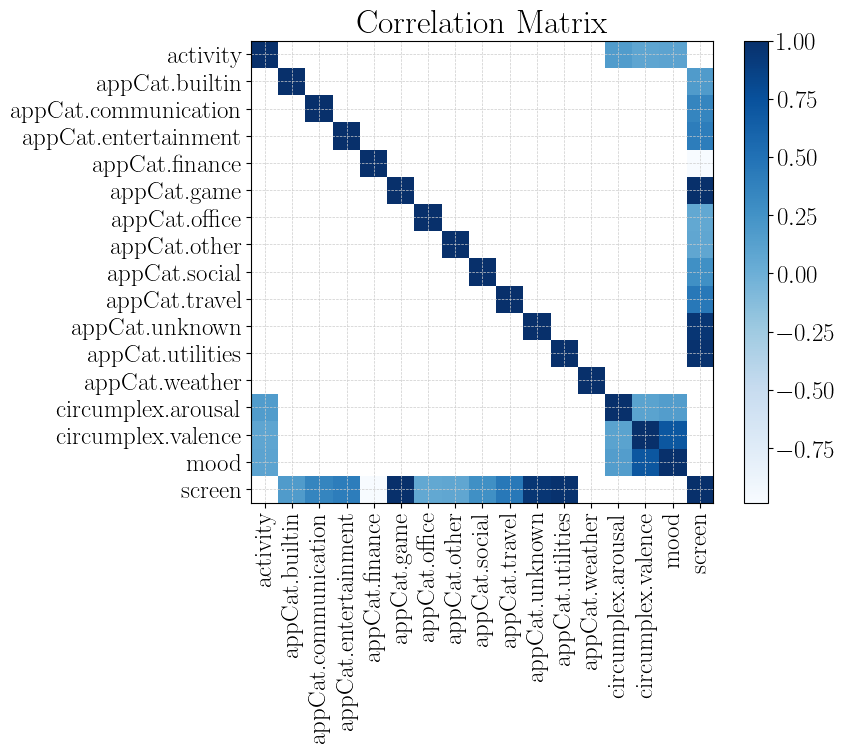

In [39]:
#First Plot: Correlation matrix to identify collinearity - MISSING VALUES

num_grouped = data.select_dtypes(include=[np.number])
# Drop call and sms variables
num_grouped = num_grouped.drop(columns=['call', 'sms'])
corr = num_grouped.corr()
plt.imshow(corr, cmap='Blues', interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.colorbar()

plt.savefig("../figures/correlation_matrix.png")
plt.show()

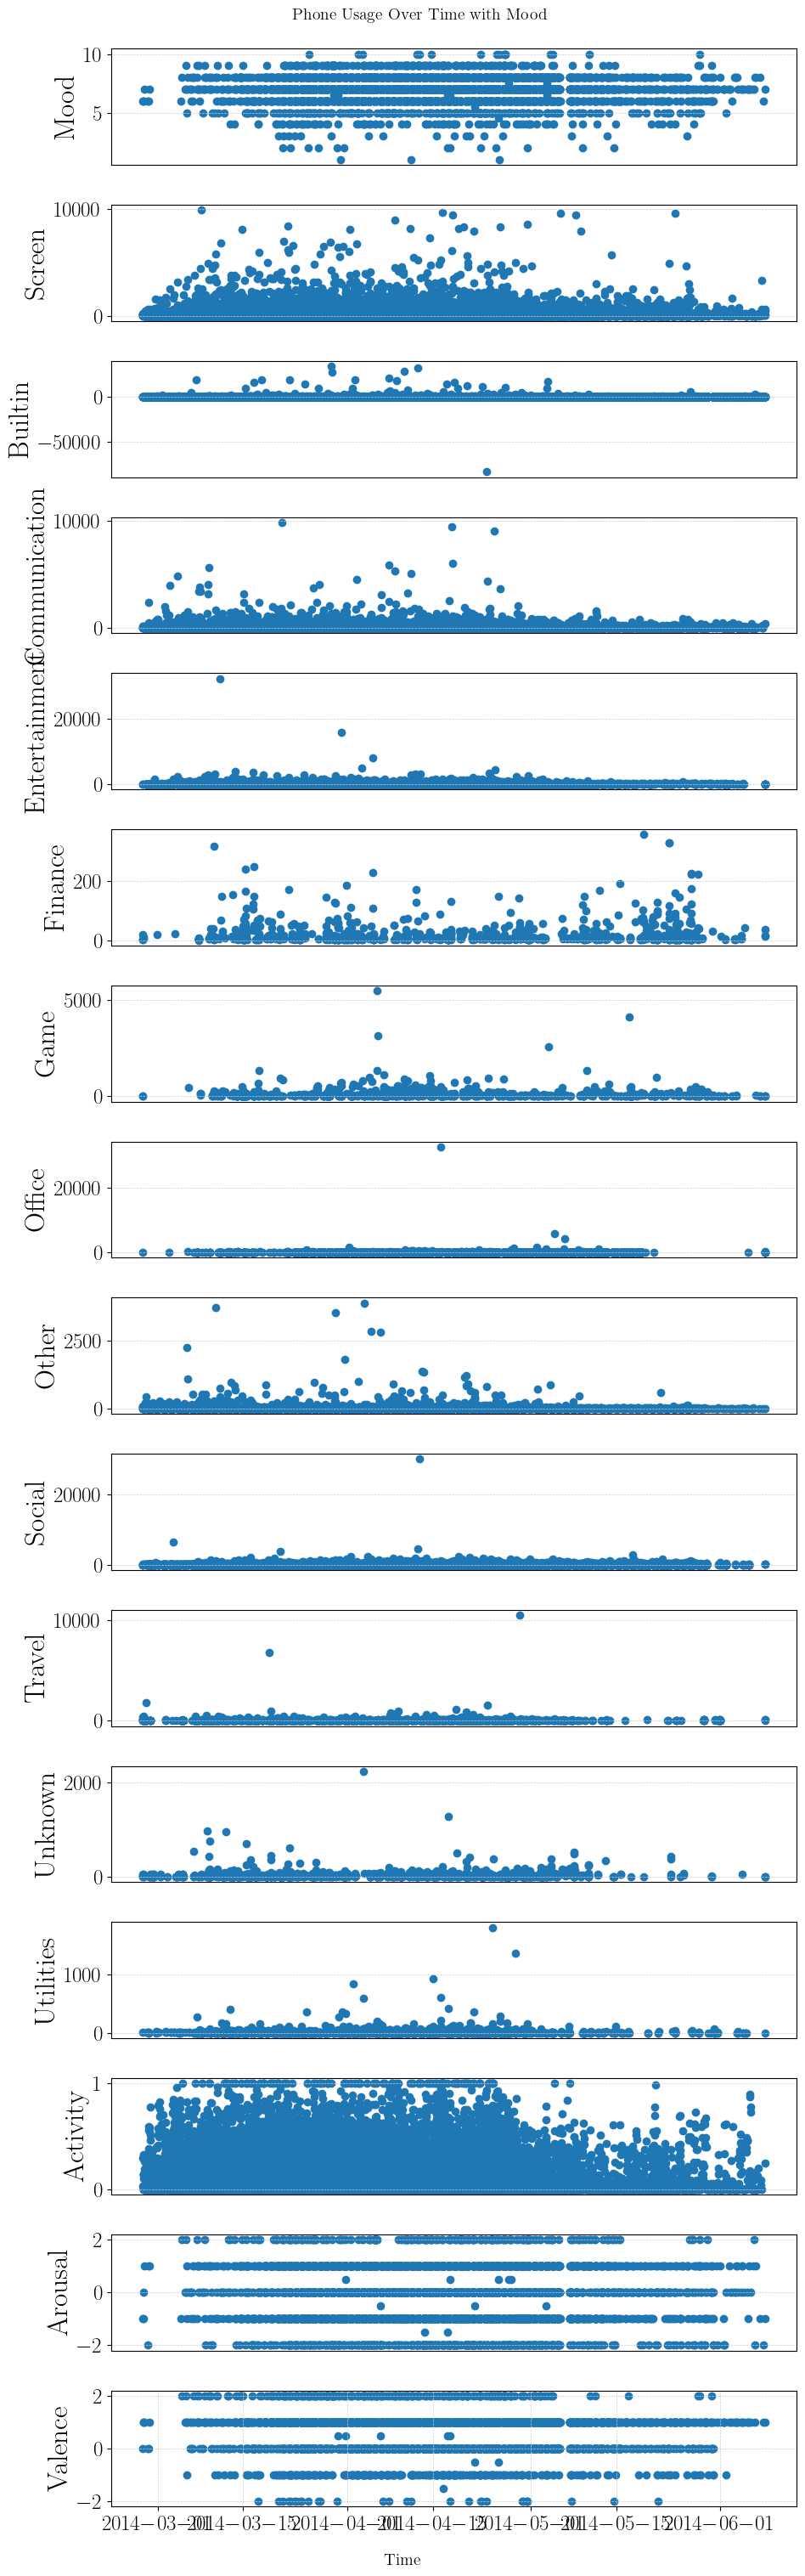

In [5]:
#Second Plot: Stacked plots over time without interpolation

mood = data['mood']
screen = data['screen']
activity = data['activity']
arousal = data['circumplex.arousal']
valence = data['circumplex.valence']
builtin = data['appCat.builtin']
communication = data['appCat.communication']
entertainment = data['appCat.entertainment']
finance = data['appCat.finance']
game = data['appCat.game']
office = data['appCat.office']
other = data['appCat.other']
social = data['appCat.social']
travel = data['appCat.travel']
unknown = data['appCat.unknown']
utilities = data['appCat.utilities']

fig, axes = plt.subplots(nrows=16, ncols=1, figsize=(10, 30))
axes[0].scatter(data["time"], mood, label='Mood')
axes[1].scatter(data["time"], screen, label='Screen')
axes[2].scatter(data["time"], builtin, label='Built-in')
axes[3].scatter(data["time"], communication, label='Communication')
axes[4].scatter(data["time"], entertainment, label='Entertainment')
axes[5].scatter(data["time"], finance, label='Finance')
axes[6].scatter(data["time"], game, label='Game')
axes[7].scatter(data["time"], office, label='Office')
axes[8].scatter(data["time"], other, label='Other')
axes[9].scatter(data["time"], social, label='Social')
axes[10].scatter(data["time"], travel, label='Travel')
axes[11].scatter(data["time"], unknown, label='Unknown')
axes[12].scatter(data["time"], utilities, label='Utilities')
axes[13].scatter(data["time"], activity, label='Activity')
axes[14].scatter(data["time"], arousal, label='Arousal')
axes[15].scatter(data["time"], valence, label='Valence')

y_labels = ['Mood','Screen','Builtin','Communication','Entertainment','Finance','Game',
            'Office','Other','Social','Travel','Unknown','Utilities', 'Activity', 'Arousal', 'Valence']

#Messing with some of the formatting
for i in range(15):
    axes[i].set_xticklabels([])
    axes[i].set_xticks([])
    axes[i].set_ylabel(y_labels[i])

axes[15].set_ylabel(y_labels[15])
fig.text(0.37, 1, 'Phone Usage Over Time with Mood', va='center', rotation='horizontal', fontsize=14)
fig.text(0.5, 0, 'Time', ha='center', fontsize=14)
plt.tight_layout()
plt.show()

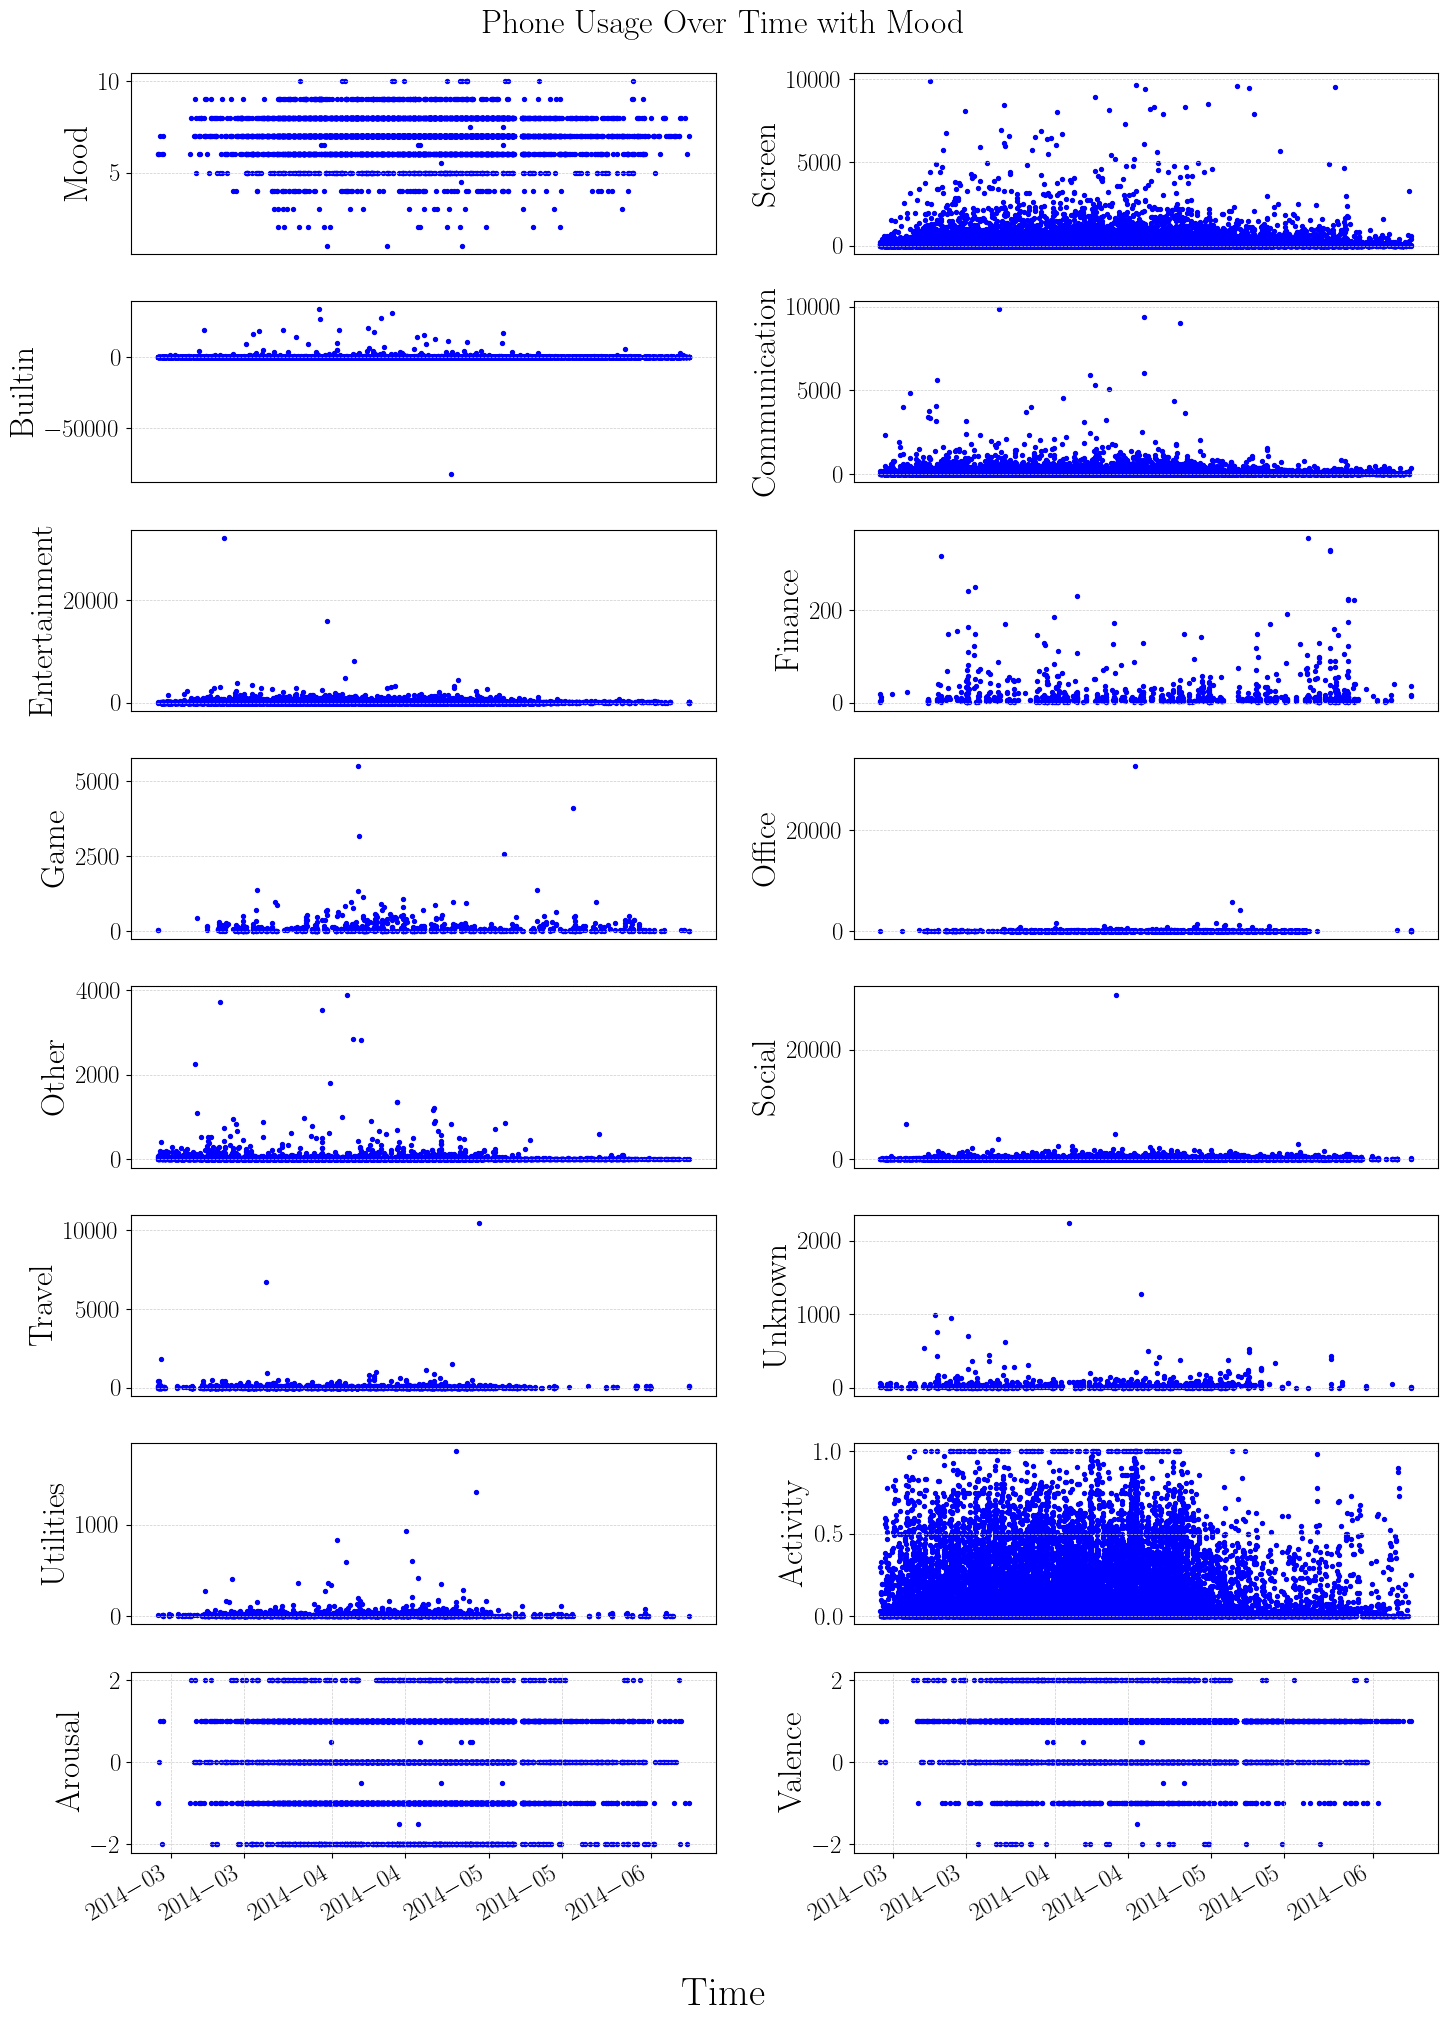

In [45]:
mood = data['mood']
screen = data['screen']
activity = data['activity']
arousal = data['circumplex.arousal']
valence = data['circumplex.valence']
builtin = data['appCat.builtin']
communication = data['appCat.communication']
entertainment = data['appCat.entertainment']
finance = data['appCat.finance']
game = data['appCat.game']
office = data['appCat.office']
other = data['appCat.other']
social = data['appCat.social']
travel = data['appCat.travel']
unknown = data['appCat.unknown']
utilities = data['appCat.utilities']

y_labels = ['Mood', 'Screen', 'Builtin', 'Communication', 'Entertainment', 'Finance', 'Game',
            'Office', 'Other', 'Social', 'Travel', 'Unknown', 'Utilities', 'Activity', 'Arousal', 'Valence']

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(15, 20))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, (label, y_data) in enumerate(zip(y_labels, [mood, screen, builtin, communication,
                                                    entertainment, finance, game, office,
                                                    other, social, travel, unknown, utilities,
                                                    activity, arousal, valence])):
    axes[i].scatter(data["time"], y_data, label=label, s=8, c='blue')
    axes[i].set_ylabel(label)

for i in range(14):
    axes[i].set_xticklabels([])
    axes[i].set_xticks([])
    axes[i].set_ylabel(y_labels[i])

axes[14].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
axes[15].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()


fig.supxlabel('Time')
fig.text(0.5, 1, 'Phone Usage Over Time with Mood', ha='center', fontsize=24)
plt.tight_layout()
plt.savefig('../figures/phone_usage_over_time.png')
plt.show()

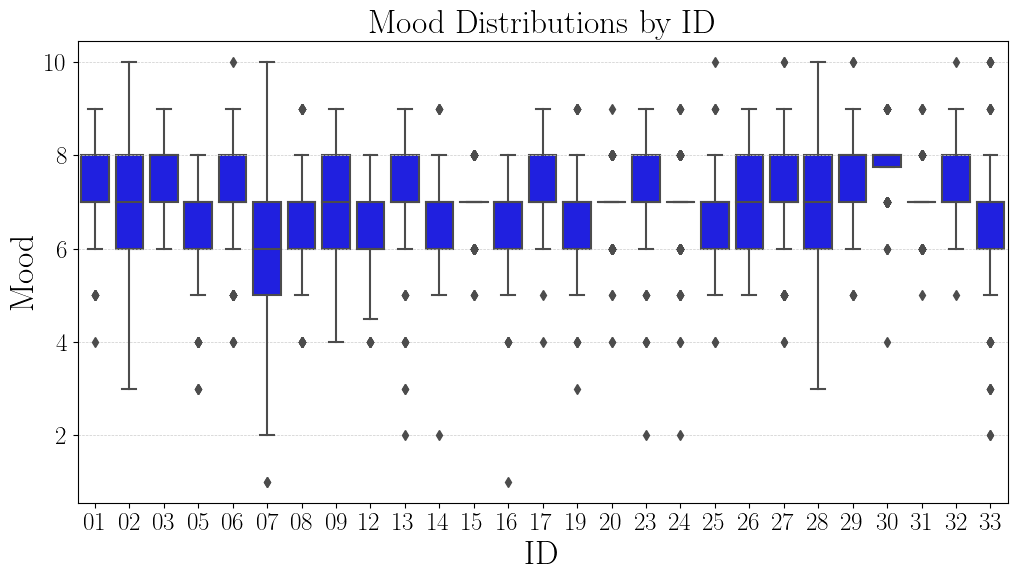

In [7]:
#Plotting Mood vs ID
plt.figure(figsize=(12, 6))  # Adjust size as needed
sorted_data = data.sort_values(by=['id', 'time']) 
sns.boxplot(x='id', y='mood', data=sorted_data, color="blue")
plt.xticks(ticks=range(len(sorted_data['id'].unique())), labels=[sorted_data['id'].unique()[i][-2:] for i in range(len(sorted_data['id'].unique()))])
plt.title('Mood Distributions by ID')
plt.xlabel('ID')
plt.ylabel('Mood')
plt.show()

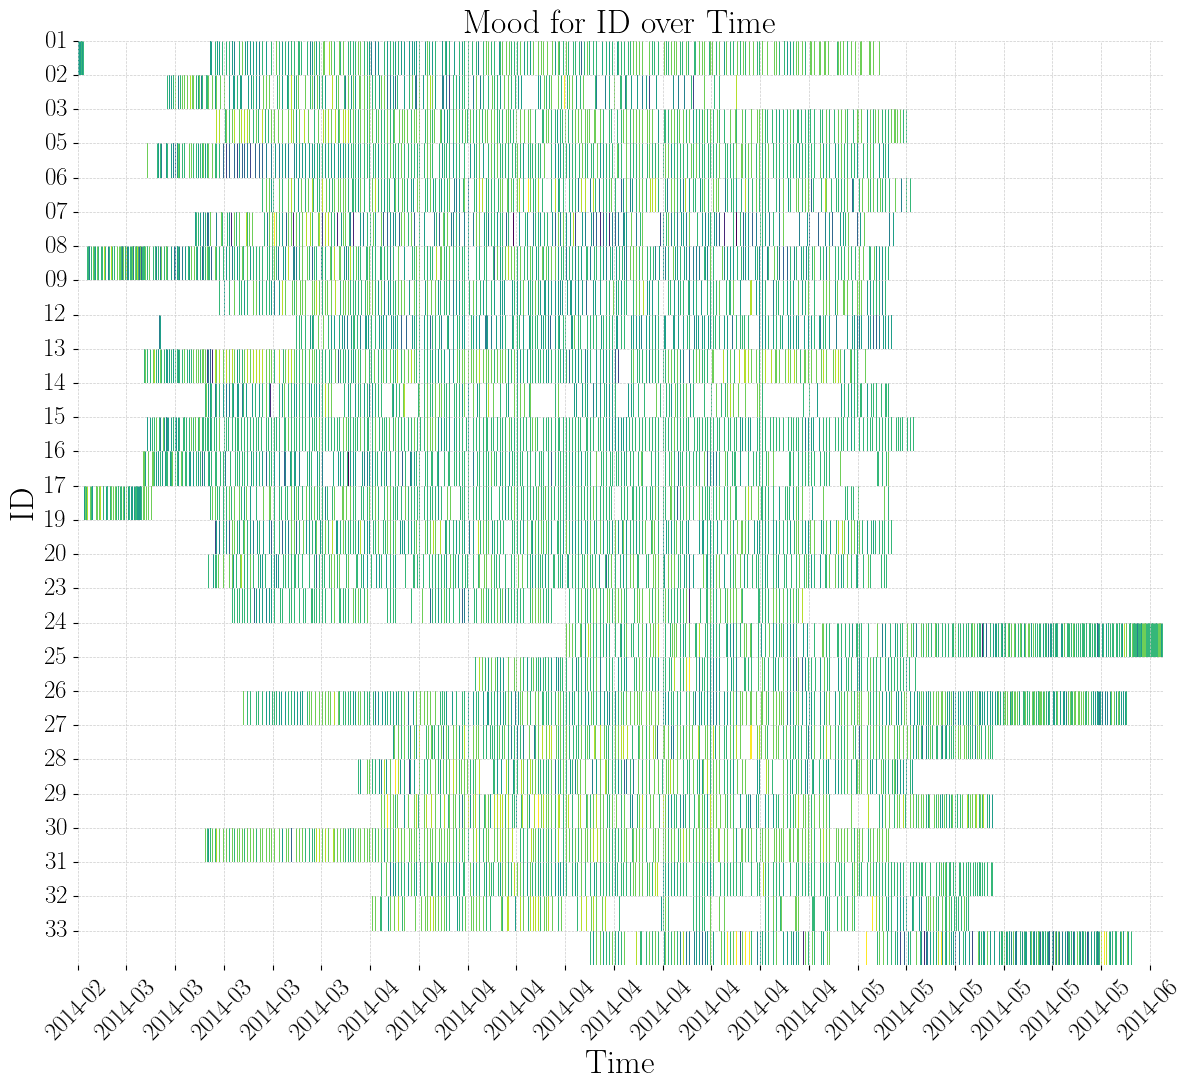

In [46]:
matrix_data = sorted_data.pivot_table(index='id', columns='time', values='mood')
plt.figure(figsize=(14, 12)) 
sns.heatmap(matrix_data, cmap='viridis', cbar=False)
plt.title('Mood for ID over Time')
plt.xlabel('Time')
#plt.xticks([])
# use column names as labels format time to Y-M
plt.xticks(ticks=range(0, len(matrix_data.columns), 50), labels=[datetime.strftime(date, '%Y-%m') for date in matrix_data.columns[::50]], rotation=45)
plt.ylabel('ID')
plt.yticks(ticks=range(len(sorted_data['id'].unique())), labels=[sorted_data['id'].unique()[i][-2:] for i in range(len(sorted_data['id'].unique()))])
plt.savefig('../figures/mood_id_time.png')
plt.show()

In [9]:
#Trying polynomial regression for trendlines because otherwise the data is kind of choppy

#Have to average over ID, otherwise it won't plot.
# mean_data = data.groupby('id').mean()
# mean_data = mean_data.dropna()

# mean_mood = mean_data['mood']
# mean_screen = mean_data['screen']
# mean_activity = mean_data['activity']
# mean_arousal = mean_data['circumplex.arousal']
# mean_valence = mean_data['circumplex.valence']
# mean_builtin = mean_data['appCat.builtin']
# mean_communication = mean_data['appCat.communication']
# mean_entertainment = mean_data['appCat.entertainment']
# mean_finance = mean_data['appCat.finance']
# mean_game = mean_data['appCat.game']
# mean_office = mean_data['appCat.office']
# mean_other = mean_data['appCat.other']
# mean_social = mean_data['appCat.social']
# mean_travel = mean_data['appCat.travel']
# mean_unknown = mean_data['appCat.unknown']
# mean_utilities = mean_data['appCat.utilities']

# fig, axes = plt.subplots(nrows=15, ncols=1, figsize=(10, 30))

# for i, variable_data in enumerate([mood, screen, builtin, communication, entertainment, 
#                         finance, game, office, other, social, travel, 
#                         unknown, utilities, activity, arousal]):
#     x = np.arange(len(mean_data['time']))
#     coefficients = np.polyfit(x, variable_data, 5)  
#     axes[i].plot(x, np.polyval(coefficients, x), color='red')
#     axes[i].fill_between(x, np.polyval(coefficients, x), color='lightcoral', alpha=0.5)

#Messing with labels and formatting
# fig.text(0.4, 1, 'Phone Usage Over Time', va='center', rotation='horizontal', fontsize=14)
# fig.text(0.5, 0, 'Time', ha='center', fontsize=14)
# for ax in axes:
#     ax.set_xticklabels([])
#     ax.set_xticks([])

# for i, ax in enumerate(axes):
#     ax.set_ylabel(y_labels[i], rotation=0, ha='right')
    
# plt.tight_layout()
# plt.show()